In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

In [6]:
df=pd.read_csv("USArrests.csv")
df.columns=['State', 'Marder', 'Assault', 'UrbanPop', 'Rape']
labelList=df.State.tolist()
df

,State,Marder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
#계층적 군집분석
single=linkage(df.iloc[:, 1:], metric='euclidean', method='single')

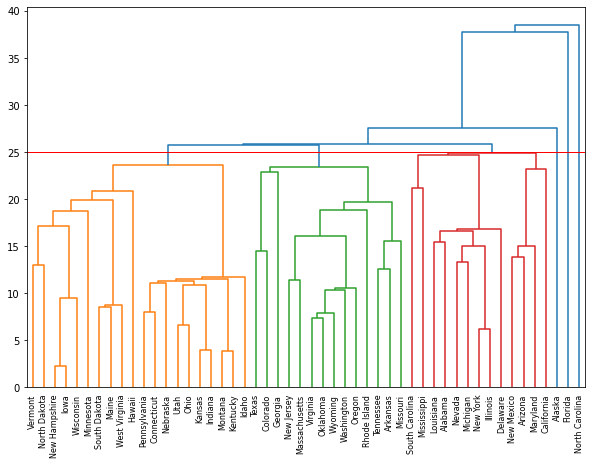

In [4]:
plt.figure(figsize=(10,7))
dendrogram(single, orientation='top', labels=labelList, distance_sort='descending', color_threshold=25, show_leaf_counts=True)
plt.axhline(y=25, color='r', linewidth=1)
plt.show()

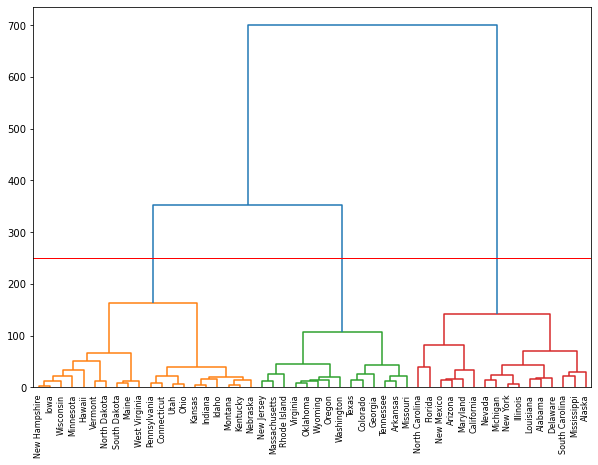

In [11]:
ward=linkage(df.iloc[:, 1:], metric='euclidean', method='ward')

plt.figure(figsize=(10,7))
dendrogram(ward, orientation='top', labels=labelList, distance_sort='descending', color_threshold=250, show_leaf_counts=True)

plt.axhline(y=250, color='r', linewidth=1)
plt.show()

In [14]:
assignments=fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [15]:
df['cluster']=assignments
df.groupby('cluster').mean()

,Marder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


### 비계층적 군집분석

In [16]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [17]:
from sklearn.metrics import calinski_harabasz_score
for k in range(2,10):
    kmeans_model=KMeans(n_clusters=k, random_state=1).fit(irisDF)
    labels=kmeans_model.labels_
    print(calinski_harabasz_score(irisDF, labels))

513.9245459802768
561.62775662962
530.4871420421675
495.54148767768777
473.5154538824768
443.84523107907245
440.59767319067873
407.0468400265113


k=3일 때 가장 높았다

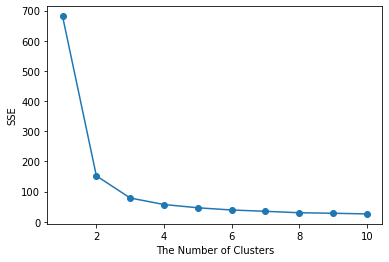

[681.3706, 152.34795176035792, 78.85144142614601, 57.25600931571816, 46.44618205128205, 39.066035353535355, 34.72327762923351, 29.990426406926403, 28.27867471563524, 26.094089542638304]


In [19]:
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
    
elbow(irisDF)

In [21]:
km=KMeans(n_clusters=3, random_state=0)
km.fit(irisDF)
print(km.labels_)
irisDF['cluster']=km.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [23]:
irisDF.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


- 실루엣계수

In [24]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [27]:
score_samples=silhouette_samples(iris.data, irisDF['cluster'])
print(score_samples.shape)
irisDF['silhouette']=score_samples

(150,)


In [28]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.425136
146,6.3,2.5,5.0,1.9,0,0.104171
147,6.5,3.0,5.2,2.0,2,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454


In [29]:
average_score=silhouette_score(iris.data, irisDF['cluster'])
average_score

0.5528190123564095

In [30]:
irisDF.groupby('cluster')['silhouette'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette, dtype: float64

In [31]:
irisDF['cluster'].value_counts()

0    62
1    50
2    38
Name: cluster, dtype: int64

- 차원축소

In [32]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) #2개로 차원축소
pca_transformed=pca.fit_transform(iris.data)
irisDF['pca_x']=pca_transformed[:, 0]
irisDF['pca_y']=pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0.852955,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0.815495,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0.829315,-2.888991,-0.144949


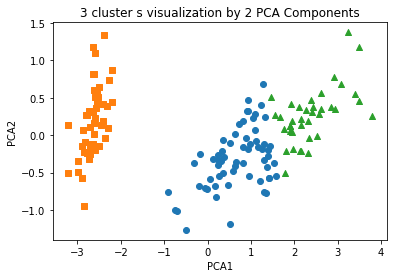

In [37]:
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title('3 cluster s visualization by 2 PCA Components')
plt.show()

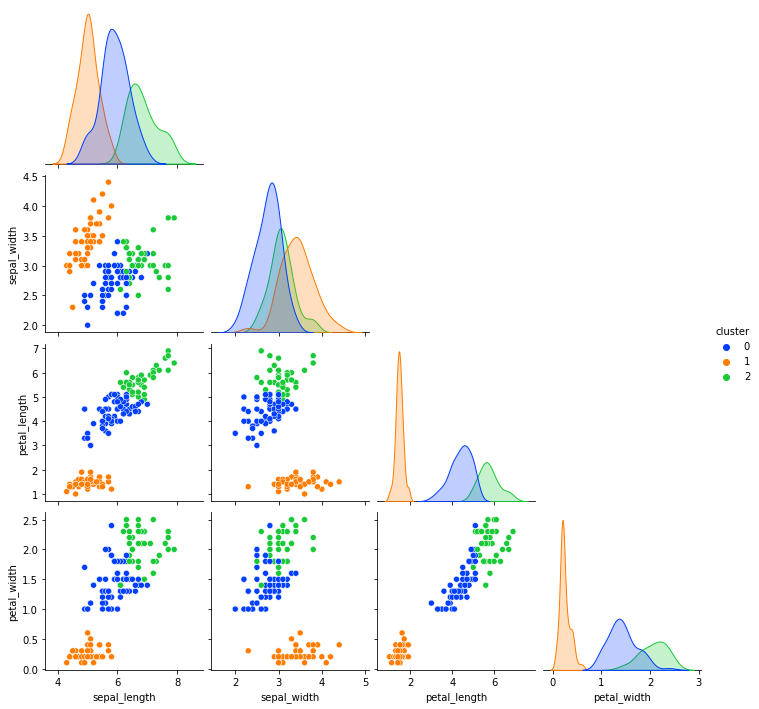

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
irisDF=irisDF.drop(columns=['pca_y', 'pca_x', 'silhouette'])
sns.pairplot(irisDF, diag_kind='kde', hue='cluster', corner=True, palette='bright')
plt.show()

### 차원축소

In [40]:
import pandas as pd
df=pd.read_csv("mtcars.csv")
df.head(3)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.iloc[:, 1:])

pca=PCA(n_components=4)
pca.fit(scaled_df)

PCA(n_components=4)

In [44]:
comp=pca.transform(scaled_df)
pca_df=pd.DataFrame(comp, columns=['주성분1', '주성분2', '주성분3', '주성분4'], index=df.iloc[:,0])
pca_df.head()

,주성분1,주성분2,주성분3,주성분4
Unnamed: 0,,,,
Mazda RX4,0.657213,1.735446,-0.601199,0.115522
Mazda RX4 Wag,0.629396,1.550033,-0.382322,0.202307
Datsun 710,2.779397,-0.146457,-0.241238,-0.249139
Hornet 4 Drive,0.311771,-2.363019,-0.135759,-0.511862
Hornet Sportabout,-1.974489,-0.754402,-1.134402,0.075653


In [45]:
loadings=pd.DataFrame(pca.components_.T, columns=['주성분1', '주성분2', '주성분3', '주성분4'], index=df.columns[1:])
loadings

,주성분1,주성분2,주성분3,주성분4
mpg,0.362531,0.016124,-0.225744,-0.022540
cyl,-0.373916,0.043744,-0.175311,-0.002592
disp,-0.368185,-0.049324,-0.061484,0.256608
hp,-0.330057,0.248784,0.140015,-0.067676
drat,0.294151,0.274694,0.161189,0.854829
wt,-0.346103,-0.143038,0.341819,0.245899
qsec,0.200456,-0.463375,0.403169,0.068077
vs,0.306511,-0.231647,0.428815,-0.214849
am,0.234943,0.429418,-0.205767,-0.030463
gear,0.206916,0.462349,0.289780,-0.264691


In [46]:
std=pd.DataFrame(pca_df.std()).T
pca_summary=pd.concat([std, pd.DataFrame(pca.explained_variance_ratio_).set_index(std.columns).T])
pca_summary

,주성분1,주성분2,주성분3,주성분4
0,2.611814,1.654076,0.804630,0.527536
0,0.600764,0.240952,0.057018,0.024509


In [47]:
import numpy as np

proportion=pca.explained_variance_ratio_
s=0
result=[]
for i in range(len(proportion)):
    s=s+proportion[i]
    result.append(np.round(s,4))
    
#index명
pca_summary.loc[1]=result

In [52]:
pca_summary.index=['표준편차', '변동량', '누적변동량']
pca_summary

,주성분1,주성분2,주성분3,주성분4
표준편차,2.611814,1.654076,0.804630,0.527536
변동량,0.600764,0.240952,0.057018,0.024509
누적변동량,0.600800,0.841700,0.898700,0.923200


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

per_var=np.round(pca.explained_variance_, decimals=1)
labels=['주성분'+str(x) for x in range(1, len(per_var)+1)]
labels

['주성분1', '주성분2', '주성분3', '주성분4']

### LDA

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

df=pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df['target']=load_iris().target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
scaled_df=scaler.fit_transform(df.iloc[:, :-1])

In [60]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda_iris=lda.fit_transform(scaled_df, df.target)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [62]:
gb=GradientBoostingClassifier(random_state=42)
score=cross_val_score(gb, df.iloc[:, :-1], df.target, scoring='accuracy', cv=5)
score.mean()

0.9600000000000002